# Evaluating Models

This code will implement two models.  The first is a simple regression model, we will show how to call the loss function, MSE during training, and output it after for test and training sets.

The second model will be a simple classification model.  We will also show how to print percent classified for both the test and training sets.

### Regression Model

For the regression model we will generate 100 random samples from a Normal(mean=1, sd=0.1).  The target will be an array of size 100 filled with the target value of 10.0.

We will fit the linear model $y=A \cdot x$ (no y intercept).  The theoretical value of `A` is `10.0`.

To start we load the necessary libraries and reset the computational graph.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

Start a graph session:

In [2]:
sess = tf.Session()

Declare the batch size:

In [3]:
batch_size = 25

### Generate Data for Regression

Here we generate the data required for the regression.  We also specify the necessary placeholders.

After we split the data into a 80-20 train-test split.

In [9]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Split data into train/test = 80%/20%
# np.random.choice関数でtrainとなるインデックスを作る
train_indices = np.random.choice(
    len(x_vals), round(len(x_vals) * 0.8), replace=False)  # round関数は四捨五入する関数
# test indices は全体からtrain indicesをひたもの
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [7]:
round(1.6)

2

In [12]:
len(x_vals_train), len(x_vals_test)

(80, 20)

In [13]:
# sklearn 使ってやると便利
from sklearn.model_selection import train_test_split
x_vals_train, x_vals_test, y_vals_train, y_vals_test = train_test_split(
    x_vals, y_vals, train_size=0.8, test_size=0.2)
len(x_vals_train), len(x_vals_test)

(80, 20)

### Model Variables and Operations

We create the model variable `A` and the multiplication operation.

In [14]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

### Loss, Optimization Function, and Variable Initialization

We use the L2 loss, and the standard Gradient Descent Optimization with a learning rate of 0.02.

In [15]:
# Add L2 loss operation to graph
# loss = tf.reduce_mean(tf.square(my_output - y_target))
loss = tf.losses.mean_squared_error(labels=y_target, predictions=my_output)
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Run Regression

We iterate 100 times through the training step, selecting a random batch of data each time.

In [16]:
# Run Loop
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(
            sess.run(loss, feed_dict={
                x_data: rand_x,
                y_target: rand_y
            })))

Step #25 A = [[6.970594]]
Loss = 9.515091
Step #50 A = [[8.874862]]
Loss = 1.8554504
Step #75 A = [[9.6069]]
Loss = 1.0399092
Step #100 A = [[9.862554]]
Loss = 0.61772376


### Evaluation of Regression Model

For the regression model evaluation, we will run the loss wih the training and test set.

In [18]:
# Evaluate accuracy (loss) on test set
mse_test = sess.run(
    loss,
    feed_dict={
        x_data: np.transpose([x_vals_test]),
        y_target: np.transpose([y_vals_test])
    })
mse_train = sess.run(
    loss,
    feed_dict={
        x_data: np.transpose([x_vals_train]),
        y_target: np.transpose([y_vals_train])
    })
print('MSE on test:' + str(np.round(mse_test, decimals=2)))  # 小数点第二位で四捨五入
print('MSE on train:' + str(np.round(mse_train, decimals=2)))

MSE on test:1.07
MSE on train:0.81


In [17]:
np.round(0.936, decimals=2)

0.94

# Classification Example

For the classification example, we generate data as follows:

The input data will be a sample of size 50 from a Normal(mean = -1, sd = 1) and a sample of 50 from a Normal(mean = 2, sd = 1).

The target data will be 50 values of 0 and 50 values of 1.

We fit the binary classification model:

- If $sigmoid(x+A)<0.5$ Then we predict class 0
- If $sigmoid(x+A)>=0.5$ Then we predict class 1

Theoretically A should be

$$ - \frac{mean1 + mean2}{2} = 0$$

We start by resetting the computational graph:

In [19]:
ops.reset_default_graph()

Create a graph session:

In [20]:
sess = tf.Session()

Declare the batch size:

In [21]:
batch_size = 25

### Generate Classification Data and Targets

We generate the classification data as described above.  Then we create the necessary placeholders.

After, we split the data in a 80-20 train-test split.

In [28]:
# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(
    2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(
    len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
# 層化ではないことに気をつける
print(np.unique(y_vals_train, return_counts=True)[1] / y_vals_train.size)
print(np.unique(y_vals_test, return_counts=True)[1] / y_vals_test.size)

[0.525 0.475]
[0.4 0.6]


In [29]:
# sklearn 使ってやると便利 stratifyを使用できる
x_vals_train, x_vals_test, y_vals_train, y_vals_test = train_test_split(
    x_vals, y_vals, train_size=0.8, test_size=0.2, stratify=y_vals)
print(np.unique(y_vals_train, return_counts=True)[1] / y_vals_train.size)
print(np.unique(y_vals_test, return_counts=True)[1] / y_vals_test.size)

[0.5 0.5]
[0.5 0.5]


### Model Variables and Operations

We create the model variable, `A`, and the model operation, which is the adding of `A` to the input data.  Note that we do not put the `sigmoid()` function in here because it will be included in the loss function.  This also means that for prediction, we will need to include the sigmoid function.

In [30]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

# Add operation to graph
# Want to create the operstion sigmoid(x + A)
# Note, the sigmoid() part is in the loss function
my_output = tf.add(x_data, A)

### Loss, Optimization Function, and Variable Initialization

The loss will be the sigmoid-cross-entropy.  We wrap that function in a `tf.reduce_mean()` so that we can reduce the sigmoid-cross-entropy over the whole batch.

The optimization function we use is again the standard Gradient Descent Optimization with a learning rate of 0.05.

In [32]:
# Add classification loss (cross entropy)
xentropy1 = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))
xentropy2 = tf.losses.sigmoid_cross_entropy(
    multi_class_labels=y_target, logits=my_output)
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy2)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Run Classification

We iterate the classification training operation for 1800 iterations and print off the `A` values along with the loss every 200 iterations

In [33]:
# Run loop
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i + 1) % 200 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        print('Xentropy1 = ' + str(
            sess.run(xentropy1, feed_dict={
                x_data: rand_x,
                y_target: rand_y
            })))
        print('Xentropy2 = ' + str(
            sess.run(xentropy2, feed_dict={
                x_data: rand_x,
                y_target: rand_y
            })))

Step #200 A = [3.610239]
Xentropy1 = 1.2183007
Xentropy2 = 1.2183007
Step #400 A = [0.5180088]
Xentropy1 = 0.4653479
Xentropy2 = 0.4653479
Step #600 A = [-0.32085332]
Xentropy1 = 0.30133662
Xentropy2 = 0.30133662
Step #800 A = [-0.451858]
Xentropy1 = 0.2625579
Xentropy2 = 0.2625579
Step #1000 A = [-0.51338416]
Xentropy1 = 0.2375156
Xentropy2 = 0.2375156
Step #1200 A = [-0.5556949]
Xentropy1 = 0.30991006
Xentropy2 = 0.30991006
Step #1400 A = [-0.5685339]
Xentropy1 = 0.24861068
Xentropy2 = 0.24861068
Step #1600 A = [-0.54755974]
Xentropy1 = 0.32681575
Xentropy2 = 0.32681575
Step #1800 A = [-0.5284851]
Xentropy1 = 0.33652705
Xentropy2 = 0.33652705


`tf.losses.sigmoid_cross_entropy`を使おうが同じ結果を得る

### Evaluation of Classification Results

(1, ?) (1, ?)
Accuracy on train set: 0.925
Accuracy on test set: 0.95


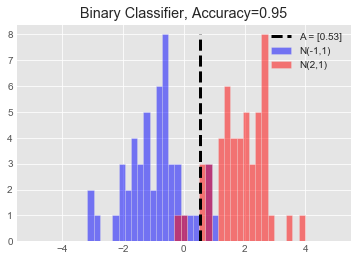

In [45]:
# Evaluate Predictions on test set
""" tf.squeezeしてもしなくても計算できる．broadcastがあるので
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(
    x_data, A))))  # tf.squeezeで1次元のところは消す
"""
y_prediction = tf.round(tf.nn.sigmoid(tf.add(x_data, A)))
print(y_prediction.shape, y_target.shape)
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(
    accuracy, feed_dict={
        x_data: [x_vals_test],
        y_target: [y_vals_test]
    })
acc_value_train = sess.run(
    accuracy, feed_dict={
        x_data: [x_vals_train],
        y_target: [y_vals_train]
    })
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

# Plot classification result
A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.style.use("ggplot")
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='blue')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot(
    (A_result, A_result), (0, 8),
    'k--',
    linewidth=3,
    label='A = ' + str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()

[plt.histのbinについて](https://qiita.com/supersaiakujin/items/be4a78809e7278c065e6#%E3%83%93%E3%83%B3%E3%81%AE%E9%96%93%E9%9A%94%E3%82%92%E8%87%AA%E5%88%86%E3%81%A7%E6%8C%87%E5%AE%9A%E3%81%97%E3%81%9F%E3%81%84%E5%A0%B4%E5%90%88)

In [41]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']